In [1]:
import math
import json
import random
from pathlib import Path
from PIL import Image
from imgaug import augmenters as iaa
import cv2
import albumentations as A
import numpy as np
from tqdm.notebook import tqdm
from IPython.display import clear_output
import time

data_path = Path("../data/")
img_path = data_path / "original.tiff"
IMG_SIZE = 10496

SEED = 42
random.seed = SEED

In [2]:
cloud_transform = iaa.Clouds(seed=SEED)


In [3]:
original_img = Image.open(img_path).convert("RGB")

/home/and/miniforge3/envs/mipt-hack/lib/python3.9/site-packages/PIL/Image.py:3035: DecompressionBombWarning: Image size (110166016 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


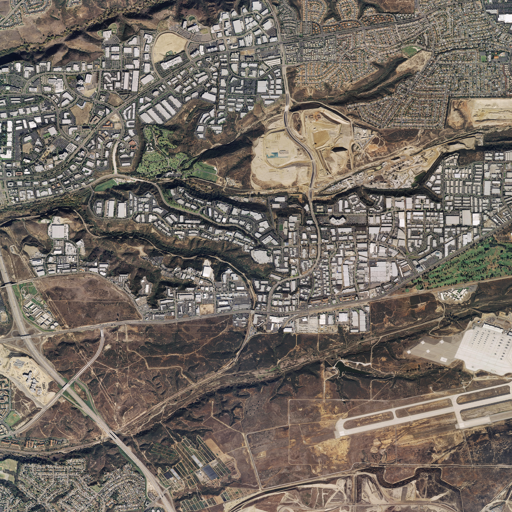

In [4]:
original_img.resize((512, 512))

In [5]:
original_img = cv2.imread(str(img_path))[..., ::-1]

In [6]:
def gen_angle():
    angle = random.randint(0, 10)
    return angle

In [127]:
def rotate(img, angle):
    aug = A.Compose(
        [
            A.Rotate
        ]
    )
    rot = iaa.Rotate((angle))
    img = aug(image=img.copy())
    return img

In [135]:
stride = 512
part_img_size = 1024
part_imgs_count = 3

i = 80

for x_min in tqdm(range(0, part_img_size * 2, stride)):
    x_max = x_min + part_img_size
    if x_max > IMG_SIZE:
        continue

    for y_min in range(0, part_img_size * 2, stride):
        y_max = y_min + part_img_size
        if y_max > IMG_SIZE:
            continue

        # angles = [gen_angle() for _ in range(part_imgs_count - 1)]
        # images = [original_img[y_min:y_max, x_min:x_max]] + [
        #     cloud_transform(image=rotate(original_img[y_min:y_max, x_min:x_max]))
        #     for angle in angles
        # ]

        images = [original_img[y_min:y_max, x_min:x_max]] + [
            cloud_transform(image=original_img[y_min:y_max, x_min:x_max])
            for _ in range(part_imgs_count - 1)
        ]

        for img in images:
            i += 1
            cv2.imwrite(str(data_path / "train_v2/img" / f"1000{i}.png"), img[..., ::-1])
            with open(data_path / "train_v2/json" / f"1000{i}.json", "w") as f:
                json.dump(
                    {
                        "left_top": [
                            x_min,
                            y_min
                        ],
                        "right_top": [
                            x_max,
                            y_min
                        ],
                        "left_bottom": [
                            x_min,
                            y_max
                        ],
                        "right_bottom": [
                            x_max,
                            y_max
                        ],
                        "angle": 0
                    }, f              
                )


  0%|          | 0/4 [00:00<?, ?it/s]

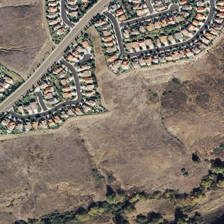

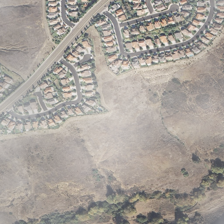

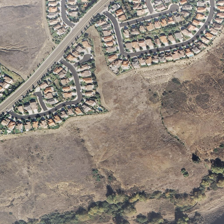

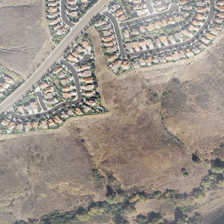

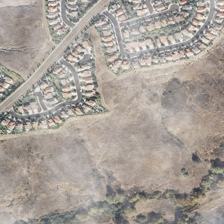

In [130]:
for img in images:
    display(Image.fromarray(img).resize((224, 224)))

In [14]:
img.size

(1024, 1024)

## EDA

In [102]:
part_img = cv2.imread(str(data_path / "train/img/1.png"))
with open(data_path / "train/json/1.json", "r") as f:
    part_img_meta = json.load(f)
points = np.array([
    part_img_meta["left_top"],
    part_img_meta["right_top"],
    part_img_meta["right_bottom"],
    part_img_meta["left_bottom"],
])
angle = part_img_meta["angle"]

In [ ]:
x_min, y_min = part_img_meta["left_top"]
x_max, y_max = 

341


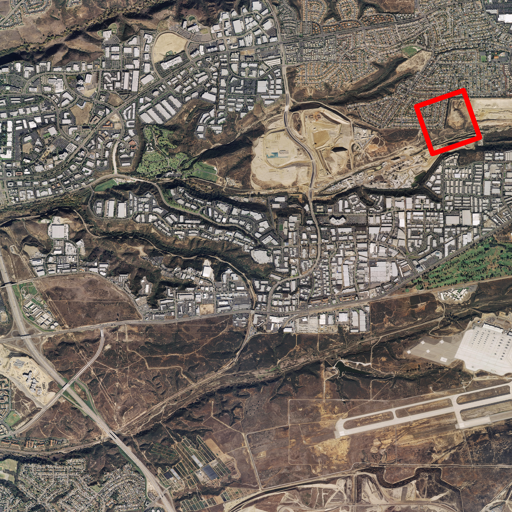

In [104]:
img = np.float32(original_img)
cv2.polylines(img, [points], True, color=(255, 0, 0), thickness=100)

img = np.uint8(img)
print(angle)
Image.fromarray(img).resize((512, 512))

In [122]:
part_imgs_paths = list((data_path / "train/img").iterdir())

img = np.float32(original_img)

for part_img_path in tqdm(part_imgs_paths[:]):
    part_img = cv2.imread(str(part_img_path))
    with open(data_path / f"train/json/{part_img_path.name[:-4]}.json", "r") as f:
        part_img_meta = json.load(f)
    points = np.array([
        part_img_meta["left_top"],
        part_img_meta["right_top"],
        part_img_meta["right_bottom"],
        part_img_meta["left_bottom"],
    ])
    angle = part_img_meta["angle"]
    cv2.polylines(img, [points], True, color=(255, 0, 0), thickness=20)

    # time.sleep(3)
    # clear_output()
    # img = np.uint8(img)
    # display(Image.fromarray(img).resize((512, 512)))


  0%|          | 0/800 [00:00<?, ?it/s]

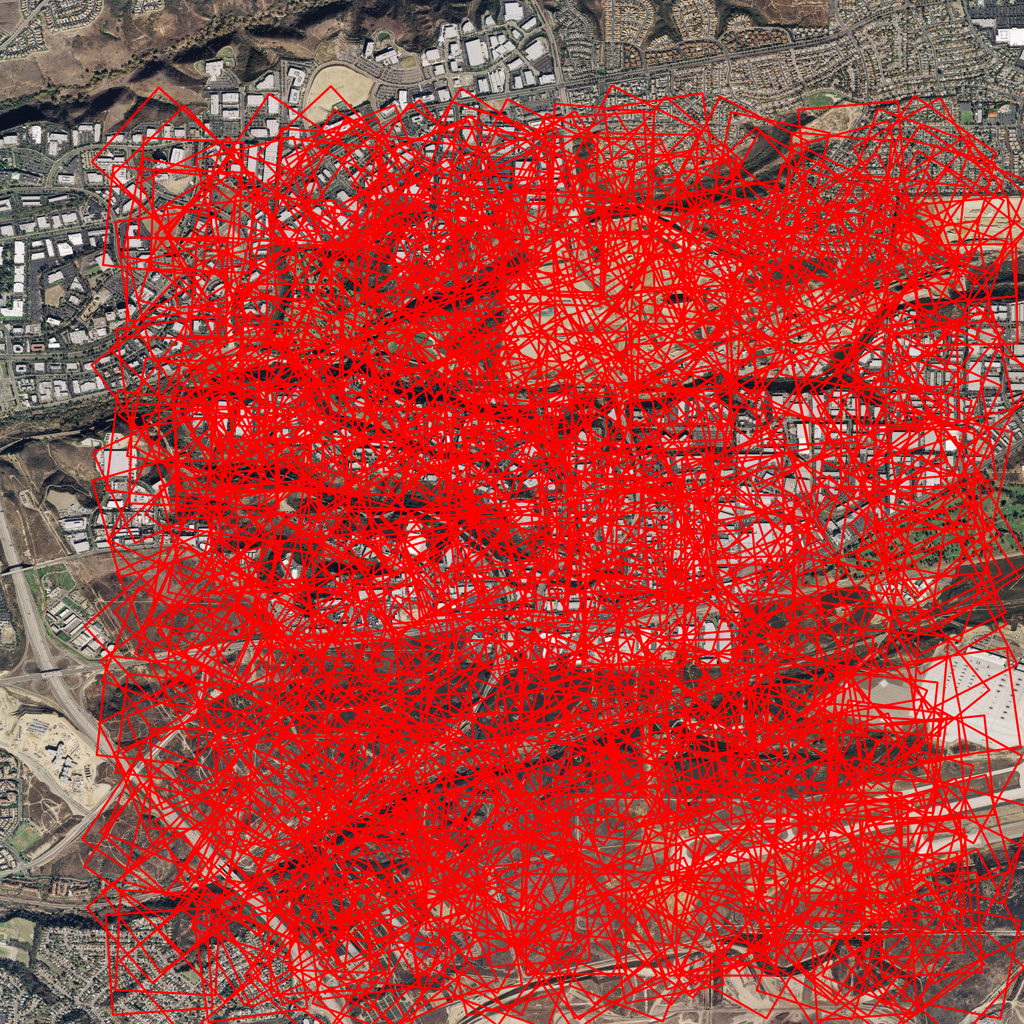

In [123]:
img = np.uint8(img)
Image.fromarray(img).resize((1024, 1024))